<a href="https://colab.research.google.com/github/UdayScience/MLforWireless/blob/main/Kernel_PCA_Signal_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Function to calculate SNR in dB
def calculate_snr(signal, noise):
    signal_power = np.sum(signal ** 2) / len(signal)
    noise_power = np.sum(noise ** 2) / len(noise)
    snr_db = 10 * np.log10(signal_power / noise_power)
    return snr_db
# Generate a noisy signal with interference
# You can replace this with your own noisy signal data
t = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(100)
interference = 0.3 * np.sin(2 * np.pi * 20 * t) + 0.2 * np.random.randn(100)
noisy_signal = signal + interference

# Reshape the data into a column vector (required for scikit-learn)
noisy_signal = noisy_signal.reshape(-1, 1)

# Apply Kernel PCA for denoising and interference cancellation
# We'll use the radial basis function (RBF) kernel, which is popular for non-linear data
kpca = KernelPCA(kernel='rbf', gamma=0.1, fit_inverse_transform=True)  # Set fit_inverse_transform=True
denoised_signal = kpca.fit_transform(noisy_signal)
denoised_signal_inverse = kpca.inverse_transform(denoised_signal)

# Calculate SNR for the denoised signal and noisy signal
snr_denoised = calculate_snr(signal, denoised_signal_inverse.flatten())
snr_noisy = calculate_snr(signal, noisy_signal.flatten())

print(f"SNR of denoised signal: {snr_denoised:.2f} dB")
print(f"SNR of noisy signal: {snr_noisy:.2f} dB")


SNR of denoised signal: 2.60 dB
SNR of noisy signal: -0.41 dB


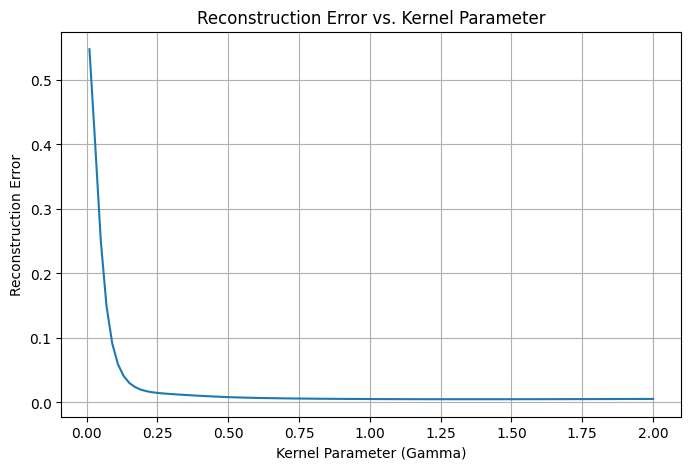

In [13]:
from sklearn.metrics import mean_squared_error

# Kernel parameter values to try
kernel_parameters = np.linspace(0.01, 2.0, 100)

# List to store reconstruction errors
reconstruction_errors = []

# Apply Kernel PCA for different kernel parameters and calculate reconstruction error
for gamma in kernel_parameters:
    kpca = KernelPCA(kernel='rbf', gamma=gamma, fit_inverse_transform=True)
    denoised_signal = kpca.fit_transform(noisy_signal)
    denoised_signal_inverse = kpca.inverse_transform(denoised_signal)
    reconstruction_error = mean_squared_error(noisy_signal, denoised_signal_inverse)
    reconstruction_errors.append(reconstruction_error)

# Plot reconstruction error vs. kernel parameter
plt.figure(figsize=(8, 5))
plt.plot(kernel_parameters, reconstruction_errors)
plt.xlabel('Kernel Parameter (Gamma)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Kernel Parameter')
plt.grid(True)
plt.show()